d:\Users\lenovo\Anaconda3\envs\school\lib\site-packages\ipykernel_launcher.py:69: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.


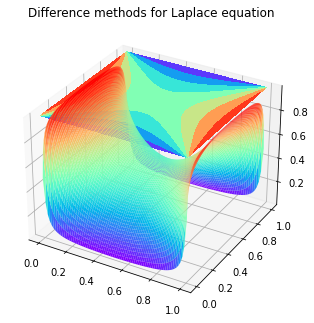

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

N=79 # 矩阵维数
Imat = -np.eye(N)/4

def Gmatrix(N): # 生成G矩阵
    mtr = np.eye(N)
    for i in range(0, N - 1):
        mtr[i][i + 1] = -1 / 4
    for i in range(1, N):
        mtr[i][i - 1] = -1 / 4
    return mtr

def zero_mat(N,m): # 生成m个横向连接N阶零矩阵,m>=1
    zero_matrix = np.zeros((N,N))
    for i in range(m-1):
        zero_matrix = np.block([zero_matrix,np.zeros((N,N))])
    return zero_matrix

def zero_arr(N, m):  # 生成m个纵向连接N阶列向量,m>=1
    zero_array = np.zeros((N,1))
    for i in range(m-1):
        zero_array = np.block([[zero_array],[np.zeros((N,1))]])
    return zero_array

def Kmatrix(N,Gmat,Imat):
    Kmar_list = []
    for i in range(N):
        if i == 0:
            Kmat_line = np.block([np.block([Gmat, Imat]),zero_mat(N,N-2)])
            Kmar_list.append(Kmat_line)
        elif i == 1:
            Kmat_line = np.block([Imat, Kmar_list[-1][:,:-N]])
            Kmar_list.append(Kmat_line)
        else:
            Kmat_line = np.block([np.zeros((N,N)), Kmar_list[-1][:,:-N]])
            Kmar_list.append(Kmat_line)
    Kmat = Kmar_list[0]
    for j in range(N-1):
        Kmat = np.block([[Kmat],[Kmar_list[j+1]]])
    return Kmat

def Barray(N): # 方程右边
    barr = np.ones((N,1))/4
    barr = np.block([[barr],[zero_arr(N,N-2)]])
    barr = np.block([[barr],[np.ones((N,1))/4]])
    return barr

Gmat = Gmatrix(N)
Kmat = Kmatrix(N,Gmat,Imat)
Barr = Barray(N)
Phi = np.linalg.solve(Kmat,Barr)

def trans(N,Phi):
    # 把线性方程组解得的列矢量分割，从左到右排列转化为方矩阵，方便可视化
    phi = Phi[0:N]
    for i in range(N-1):
        j = i+1
        phi = np.block([phi,Phi[(j*N):((j+1)*N)]])
    return phi

Phi = trans(N,Phi)
x = np.linspace(0,1,N)
y = np.linspace(0,1,N)
X,Y = np.meshgrid(x,y)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X,Y,Phi,rstride=1,cstride=1,cmap=plt.get_cmap('rainbow'))
ax.contourf(X,Y,Phi,zdir='z',offset=1,cmap='rainbow')
plt.title('Difference methods for Laplace equation',fontsize='12')
plt.show()